In [1]:
import pandas as pd
#from kid_readout.analysis import dataframe

In [2]:
def zbd_peak_voltage(lockin_rms_voltage):
    return 2**(-1/2) * np.pi * lockin_rms_voltage

def lockin_rms_voltage(zbd_peak_voltage):
    return 2**(1/2) / np.pi * zbd_peak_voltage

def zbd_power(lockin_rms_voltage, optical_frequency=None):
    if optical_frequency is None:
        return zbd_peak_voltage(lockin_rms_voltage) / 2200
    else:
        return zbd_peak_voltage(lockin_rms_voltage) / zbd.ZBD().responsivity(optical_frequency)

In [42]:
def linearity(df, mickey_high, mickey_low, minnie_high, minnie_low):
    hh = df[(df.mickey==mickey_high) & (df.minnie==minnie_high)].iloc[0].zbd_power
    hl = df[(df.mickey==mickey_high) & (df.minnie==minnie_low)].iloc[0].zbd_power
    lh = df[(df.mickey==mickey_low) & (df.minnie==minnie_high)].iloc[0].zbd_power
    ll = df[(df.mickey==mickey_low) & (df.minnie==minnie_low)].iloc[0].zbd_power
    return (hh * ll) / (hl * lh)

In [59]:
mickey_high = 5
mickey_low = 9
minnie_high = 5
minnie_low = 9
linearity(df, mickey_high, mickey_low, minnie_high, minnie_low)

1.5896848222878939

In [3]:
df_filename = '/home/flanigan/equipment/vdi/calibration_broadband_preliminary.npy'
df = pd.DataFrame().from_records(np.load(df_filename))

In [31]:
df['zbd_peak_voltage'] = zbd_peak_voltage(df.R)
df['zbd_power'] = zbd_power(df.R, None)
minimum_linear_power = 1e-6
maximum_linear_power = 10e-6
df['is_linear'] =  (df.zbd_power > minimum_linear_power) & (df.zbd_power < maximum_linear_power)

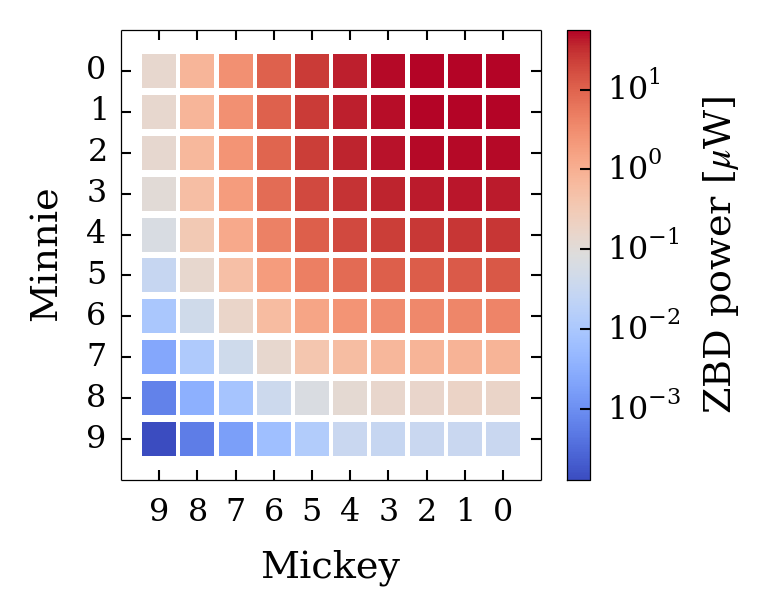

In [89]:
fig, ax = plt.subplots(figsize=(2.5, 2))
data = 1e6 * df.zbd_power
norm = matplotlib.colors.LogNorm
mappable = plt.cm.ScalarMappable(norm(min(data), max(data)), cmap=plt.cm.coolwarm)
mappable.set_array(np.array(data))
for n, row in df.iterrows():
    ax.plot(row.mickey, row.minnie, color=mappable.to_rgba(1e6 * row.zbd_power),
            marker='s', markersize=8, markeredgecolor='none')
ax.set_xlim(10, -1)
ax.set_xticks(range(9, -1, -1))
ax.set_ylim(10, -1)
ax.set_yticks(range(9, -1, -1))
ax.set_xlabel('Mickey')
ax.set_ylabel('Minnie')
fig.colorbar(mappable, label=r'ZBD power [$\mu$W]');

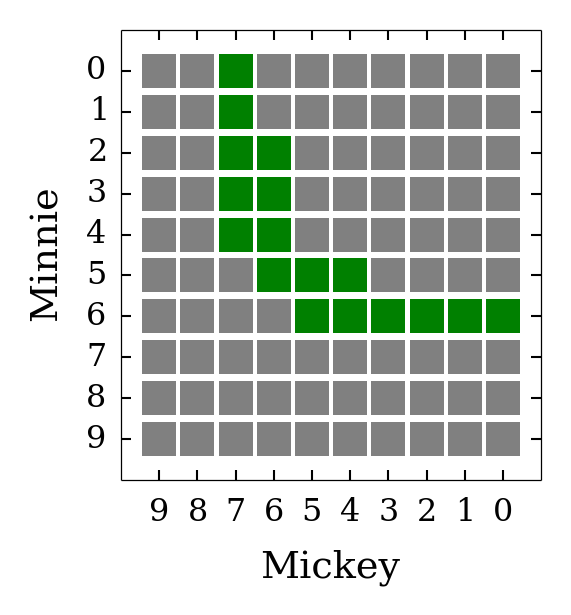

In [91]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(df.mickey[df.is_linear], df.minnie[df.is_linear],
        color='green', marker='s', markersize=8, markeredgecolor='none', linestyle='none')
ax.plot(df.mickey[~df.is_linear], df.minnie[~df.is_linear],
        color='gray', marker='s', markersize=8, markeredgecolor='none', linestyle='none')
ax.set_xlim(10, -1)
ax.set_xticks(range(9, -1, -1))
ax.set_ylim(10, -1)
ax.set_yticks(range(9, -1, -1))
ax.set_xlabel('Mickey')
ax.set_ylabel('Minnie');

In [94]:
1e6 * df[(df.mickey==6) & (df.minnie==6)].zbd_power

20    0.632012
Name: zbd_power, dtype: float64

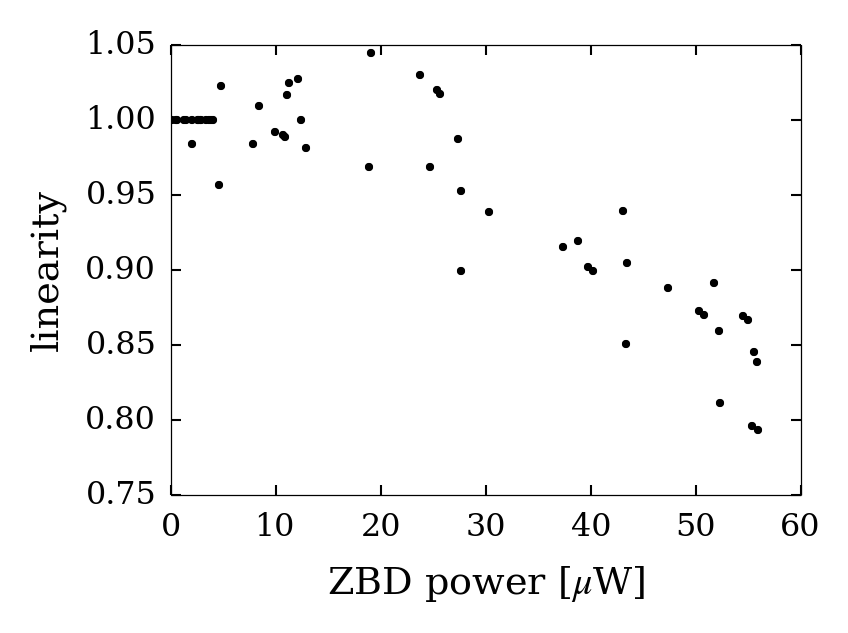

In [107]:
fig, ax = plt.subplots()
mickey_low = 7
minnie_low = 6
for mickey_high in range(0, mickey_low+1):
    for minnie_high in range(0, minnie_low+1):
        mask = (df.mickey==mickey_high) & (df.minnie==minnie_high)
        ax.plot(1e6 * df[mask].iloc[0].zbd_power,
                linearity(df, mickey_high, mickey_low, minnie_high, minnie_low),
               '.k')
ax.set_xlabel(r'ZBD power [$\mu$W]')
ax.set_ylabel('linearity')

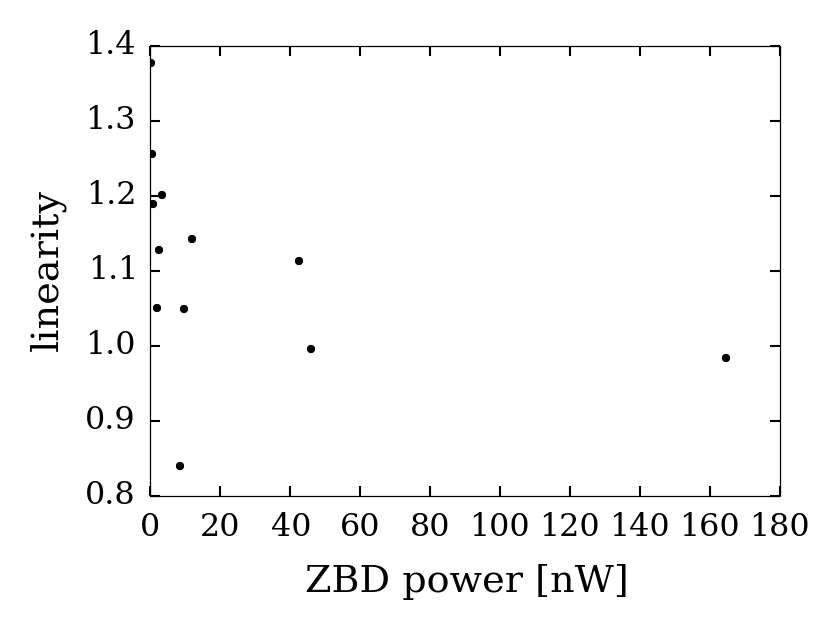

In [109]:
fig, ax = plt.subplots()
mickey_high = 6  # 7
minnie_high = 5  # 6
for mickey_low in range(mickey_high+1, 10):
    for minnie_low in range(minnie_high+1, 10):
        mask = (df.mickey==mickey_low) & (df.minnie==minnie_low)
        ax.plot(1e9 * df[mask].iloc[0].zbd_power,
                linearity(df, mickey_high, mickey_low, minnie_high, minnie_low),
               '.k')
ax.set_xlabel(r'ZBD power [nW]')
ax.set_ylabel('linearity')